In [1]:
!pip install "protobuf==3.20.3" --quiet
print('installed')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, bu

In [2]:
import os

# <-- EDIT THIS: set to your dataset folder (contains class subfolders)
DATA_DIR = "/kaggle/input/cevi-img-dataset/Final Dataset - Cleaned (1)"

# Do not change below
if not os.path.exists(DATA_DIR):
    raise FileNotFoundError(f"Dataset folder not found: {DATA_DIR}. Check the path.")

# Count images per class
classes = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print("Found classes:", classes)
total = 0
for c in classes:
    cnt = len([f for f in os.listdir(os.path.join(DATA_DIR,c)) if f.lower().endswith(('.jpg','.jpeg','.png'))])
    print(f"  {c}: {cnt} images")
    total += cnt
print("Total images:", total)

Found classes: ['gobi manchurian', 'momos', 'dhokla', 'capsicum', 'fried chicken', 'gujiya', 'orange', 'kofta', 'pav bhaji', 'tomato', 'kaju katli', 'turnip', 'rajma', 'missi roti', 'ginger', 'mysore pak', 'paratha', 'achar', 'lassi', 'papad', 'spring rolls', 'fried rice', 'kathi roll', 'aloo gobi', 'naan bread', 'pineapple', 'masala dosa', 'sandwich', 'aloo tikki', 'bagels', 'apple', 'palak paneer', 'bhindi masala', 'medu vada', 'besan cheela', 'lettuce', 'omelette', 'onion pakoda', 'beetroot', 'chow mein', 'kiwi', 'rasgulla', 'shankarpali', 'imarti', 'mishti doi', 'chicken rezala', 'pear', 'scrambled eggs', 'vada pav', 'ras malai', 'popcorn', 'toast', 'cabbage', 'kadai paneer', 'canned potatoes', 'chai', 'cooked pasta', 'basundi', 'chapati', 'cauliflower', 'phirni', 'sheera', 'sunny side up eggs', 'khandvi', 'kebabs', 'baingan bharta', 'malpua', 'shrikhand', 'idli', 'jalebi', 'appam', 'taco', 'kachori', 'litti chokha', 'stuffed karela', 'sheer khurma', 'kadhi pakoda', 'butter chicken

2025-12-29 13:41:53.739865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767015713.929538      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767015713.983522      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Using DATA_DIR: /kaggle/input/cevi-img-dataset/Final Dataset - Cleaned (1)
OUTPUT_DIR: /kaggle/working/
Found 14051 images belonging to 124 classes.
Found 3449 images belonging to 124 classes.
Num classes: 124
Train samples: 14051 Val samples: 3449


I0000 00:00:1767015737.361728      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1767015737.362333      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 112, 112,  │        432 │ rescaling[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 112, 112,  │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        144 │ activation[0][0]  │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        256 │ re_lu[0][0]       │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_add   │ (None, 112, 112,  │          0 │ activation[0][0], │
│ (Add)               │ 16)               │            │ expanded_conv_pr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 112, 112,  │      1,024 │ expanded_conv_ad… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 112, 112,  │        256 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 112, 112,  │          0 │ expanded_conv_1_… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 113, 113,  │          0 │ re_lu_1[0][0]     │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 56, 56,    │        576 │ expanded_conv_1_… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 56, 56,    │        256 │ expanded_conv_1_

 Total params: 3,551,996 (13.55 MB)

 Trainable params: 555,644 (2.12 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12


I0000 00:00:1767015751.275305     132 service.cc:148] XLA service 0x79f79c11a220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767015751.276268     132 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1767015751.276289     132 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1767015752.483467     132 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/440 ━━━━━━━━━━━━━━━━━━━━ 2:04:51 17s/step - accuracy: 0.0000e+00 - loss: 6.0726

I0000 00:00:1767015758.616946     132 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 98/440 ━━━━━━━━━━━━━━━━━━━━ 4:29 788ms/step - accuracy: 0.0807 - loss: 4.7390

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.2470 - loss: 3.4590

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))



Epoch 1: val_accuracy improved from -inf to 0.63671, saving model to /kaggle/working/best_mobilenetv3_large.h5


440/440 ━━━━━━━━━━━━━━━━━━━━ 438s 958ms/step - accuracy: 0.2473 - loss: 3.4570 - val_accuracy: 0.6367 - val_loss: 1.3367 - learning_rate: 0.0010
Epoch 2/12
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.5748 - loss: 1.5450
Epoch 2: val_accuracy improved from 0.63671 to 0.69701, saving model to /kaggle/working/best_mobilenetv3_large.h5


440/440 ━━━━━━━━━━━━━━━━━━━━ 334s 759ms/step - accuracy: 0.5748 - loss: 1.5449 - val_accuracy: 0.6970 - val_loss: 1.1112 - learning_rate: 0.0010
Epoch 3/12
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.6427 - loss: 1.2646
Epoch 3: val_accuracy improved from 0.69701 to 0.71035, saving model to /kaggle/working/best_mobilenetv3_large.h5


440/440 ━━━━━━━━━━━━━━━━━━━━ 334s 758ms/step - accuracy: 0.6427 - loss: 1.2646 - val_accuracy: 0.7104 - val_loss: 1.0361 - learning_rate: 0.0010
Epoch 4/12
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.6715 - loss: 1.1447
Epoch 4: val_accuracy improved from 0.71035 to 0.72369, saving model to /kaggle/working/best_mobilenetv3_large.h5


440/440 ━━━━━━━━━━━━━━━━━━━━ 332s 754ms/step - accuracy: 0.6715 - loss: 1.1448 - val_accuracy: 0.7237 - val_loss: 1.0162 - learning_rate: 0.0010
Epoch 5/12
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.7048 - loss: 1.0261
Epoch 5: val_accuracy improved from 0.72369 to 0.72833, saving model to /kaggle/working/best_mobilenetv3_large.h5


440/440 ━━━━━━━━━━━━━━━━━━━━ 334s 761ms/step - accuracy: 0.7048 - loss: 1.0261 - val_accuracy: 0.7283 - val_loss: 1.0143 - learning_rate: 0.0010
Epoch 6/12
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.7167 - loss: 0.9457
Epoch 6: val_accuracy improved from 0.72833 to 0.73152, saving model to /kaggle/working/best_mobilenetv3_large.h5


440/440 ━━━━━━━━━━━━━━━━━━━━ 331s 753ms/step - accuracy: 0.7167 - loss: 0.9457 - val_accuracy: 0.7315 - val_loss: 0.9796 - learning_rate: 0.0010
Epoch 7/12
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.7268 - loss: 0.9130
Epoch 7: val_accuracy improved from 0.73152 to 0.74485, saving model to /kaggle/working/best_mobilenetv3_large.h5


440/440 ━━━━━━━━━━━━━━━━━━━━ 333s 756ms/step - accuracy: 0.7268 - loss: 0.9130 - val_accuracy: 0.7449 - val_loss: 0.9660 - learning_rate: 0.0010
Epoch 8/12
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.7541 - loss: 0.8202
Epoch 8: val_accuracy did not improve from 0.74485
440/440 ━━━━━━━━━━━━━━━━━━━━ 334s 760ms/step - accuracy: 0.7540 - loss: 0.8203 - val_accuracy: 0.7382 - val_loss: 0.9951 - learning_rate: 0.0010
Epoch 9/12
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.7550 - loss: 0.8047
Epoch 9: val_accuracy improved from 0.74485 to 0.75065, saving model to /kaggle/working/best_mobilenetv3_large.h5


440/440 ━━━━━━━━━━━━━━━━━━━━ 336s 764ms/step - accuracy: 0.7550 - loss: 0.8047 - val_accuracy: 0.7507 - val_loss: 0.9571 - learning_rate: 0.0010
Epoch 10/12
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.7628 - loss: 0.7739
Epoch 10: val_accuracy did not improve from 0.75065
440/440 ━━━━━━━━━━━━━━━━━━━━ 334s 759ms/step - accuracy: 0.7628 - loss: 0.7739 - val_accuracy: 0.7449 - val_loss: 0.9913 - learning_rate: 0.0010
Epoch 11/12
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.7664 - loss: 0.7635
Epoch 11: val_accuracy did not improve from 0.75065
440/440 ━━━━━━━━━━━━━━━━━━━━ 333s 757ms/step - accuracy: 0.7664 - loss: 0.7635 - val_accuracy: 0.7507 - val_loss: 0.9415 - learning_rate: 0.0010
Epoch 12/12
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.7728 - loss: 0.7337
Epoch 12: val_accuracy did not improve from 0.75065
440/440 ━━━━━━━━━━━━━━━━━━━━ 330s 751ms/step - accuracy: 0.7728 - loss: 0.7337 - val_accuracy: 0.7405 - val_loss: 0.9949 - learning_rate: 0.00

E0000 00:00:1767019861.044865     131 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1767019861.182684     131 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.6031 - loss: 1.5101
Epoch 1: val_accuracy did not improve from 0.75065
440/440 ━━━━━━━━━━━━━━━━━━━━ 366s 786ms/step - accuracy: 0.6031 - loss: 1.5098 - val_accuracy: 0.7504 - val_loss: 0.9805 - learning_rate: 1.0000e-05
Epoch 2/6
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.6900 - loss: 1.0820
Epoch 2: val_accuracy improved from 0.75065 to 0.75239, saving model to /kaggle/working/best_mobilenetv3_large.h5


440/440 ━━━━━━━━━━━━━━━━━━━━ 338s 768ms/step - accuracy: 0.6900 - loss: 1.0819 - val_accuracy: 0.7524 - val_loss: 0.9865 - learning_rate: 1.0000e-05
Epoch 3/6
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.7296 - loss: 0.9178
Epoch 3: val_accuracy did not improve from 0.75239

Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
440/440 ━━━━━━━━━━━━━━━━━━━━ 337s 766ms/step - accuracy: 0.7296 - loss: 0.9178 - val_accuracy: 0.7518 - val_loss: 0.9813 - learning_rate: 1.0000e-05
Epoch 4/6
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.7422 - loss: 0.8598
Epoch 4: val_accuracy did not improve from 0.75239
440/440 ━━━━━━━━━━━━━━━━━━━━ 341s 776ms/step - accuracy: 0.7422 - loss: 0.8598 - val_accuracy: 0.7498 - val_loss: 0.9876 - learning_rate: 5.0000e-06
Epoch 5/6
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.7567 - loss: 0.7997
Epoch 5: val_accuracy did not improve from 0.75239

Epoch 5: ReduceLROnPlateau reducing learning rate to 2.499999

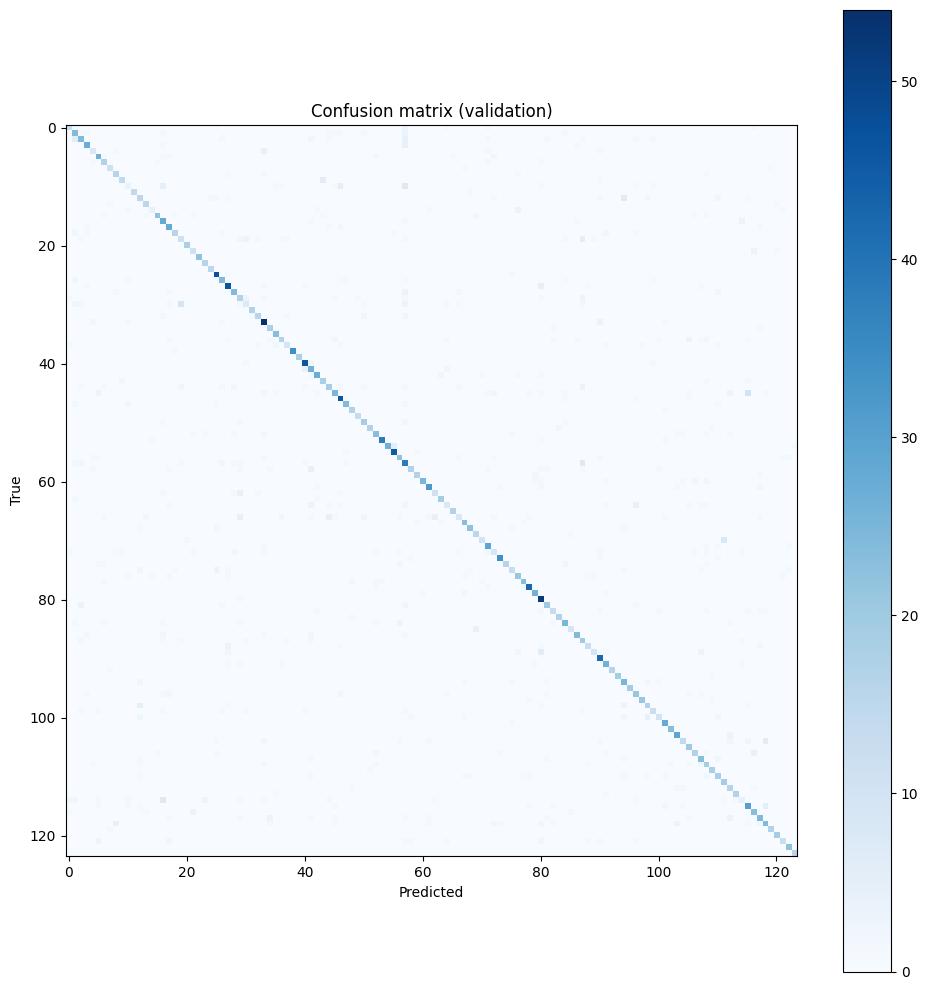

Saved final model: /kaggle/working/mobilenetv3_large_final.h5
INFO:tensorflow:Assets written to: /tmp/tmpole32437/assets


INFO:tensorflow:Assets written to: /tmp/tmpole32437/assets


Saved artifact at '/tmp/tmpole32437'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 124), dtype=tf.float32, name=None)
Captures:
  134107574771472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134107574773968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134107574770704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134107574772816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134107574772624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134107574774352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134107574775888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134107574774736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134107574770128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134107574775504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134107574773

W0000 00:00:1767022023.722183      47 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1767022023.722226      47 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1767022023.860459      47 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


Saved TFLite: /kaggle/working/mobilenetv3_large.tflite
Training complete. Models & artifacts are in: /kaggle/working/


In [3]:
# Full training pipeline (MobileNetV3-Large classifier)
# Paste this into Colab and run (use GPU runtime).

import os, math, numpy as np, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large, mobilenet_v3
from tensorflow.keras import layers, Model
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# ---------- EDIT THESE ----------
DATA_DIR = "/kaggle/input/cevi-img-dataset/Final Dataset - Cleaned (1)"   # <- set this to your dataset root (class subfolders)
OUTPUT_DIR = "/kaggle/working/"
BATCH_SIZE = 32
IMG_SIZE = (224,224)
EPOCHS_HEAD = 12         # train head for this many epochs
EPOCHS_FINE = 6          # fine-tune epochs (after unfreeze)
VAL_SPLIT = 0.2
UNFREEZE_AT = -30        # unfreeze last ~30 layers of backbone for fine-tuning
# --------------------------------

os.makedirs(OUTPUT_DIR, exist_ok=True)
print("Using DATA_DIR:", DATA_DIR)
print("OUTPUT_DIR:", OUTPUT_DIR)

# ----- Generators (correct preprocessing; DO NOT use rescale=1./255 when using preprocess_input) -----
train_gen = ImageDataGenerator(
    preprocessing_function=mobilenet_v3.preprocess_input,
    rotation_range=15, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=0.05, zoom_range=0.1, horizontal_flip=True,
    validation_split=VAL_SPLIT
)
val_gen = ImageDataGenerator(preprocessing_function=mobilenet_v3.preprocess_input, validation_split=VAL_SPLIT)

train_flow = train_gen.flow_from_directory(
    DATA_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical',
    subset='training', seed=42
)
val_flow = val_gen.flow_from_directory(
    DATA_DIR, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical',
    subset='validation', seed=42, shuffle=False
)

num_classes = train_flow.num_classes
print("Num classes:", num_classes)
print("Train samples:", train_flow.samples, "Val samples:", val_flow.samples)

# ----- Build model -----
backbone = MobileNetV3Large(input_shape=(IMG_SIZE[0],IMG_SIZE[1],3), include_top=False, weights='imagenet')
x = backbone.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model = Model(inputs=backbone.input, outputs=outputs)

# Freeze backbone initially
backbone.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ----- Callbacks -----
best_path = os.path.join(OUTPUT_DIR, "best_mobilenetv3_large.h5")
cbs = [
    tf.keras.callbacks.ModelCheckpoint(best_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=False, verbose=1)
]

# ----- Train head -----
history = model.fit(
    train_flow,
    epochs=EPOCHS_HEAD,
    validation_data=val_flow,
    callbacks=cbs
)

# ----- Unfreeze & fine-tune -----
# Unfreeze last N layers
if UNFREEZE_AT < 0:
    for layer in backbone.layers[UNFREEZE_AT:]:
        layer.trainable = True
else:
    for layer in backbone.layers[UNFREEZE_AT:]:
        layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy', metrics=['accuracy'])

history_ft = model.fit(
    train_flow,
    epochs=EPOCHS_FINE,
    validation_data=val_flow,
    callbacks=cbs
)

# ----- Load best model if present -----
if os.path.exists(best_path):
    model.load_weights(best_path)
    print("Loaded best checkpoint:", best_path)

# ----- Evaluate -----
val_steps = math.ceil(val_flow.samples / BATCH_SIZE)
print("Evaluating on validation set...")
res = model.evaluate(val_flow, steps=val_steps, verbose=1)
print("Val loss, val acc:", res)

# ----- Predict & Confusion Matrix -----
y_pred_probs = model.predict(val_flow, steps=val_steps, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_flow.classes
labels = list(val_flow.class_indices.keys())

print("Classification report:")
print(classification_report(y_true, y_pred, target_names=labels, zero_division=0))

cm = confusion_matrix(y_true, y_pred)
# Simple confusion plot (may be large for many classes)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion matrix (validation)")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# ----- Save final model & convert to TFLite -----
final_saved = os.path.join(OUTPUT_DIR, "mobilenetv3_large_final.h5")
model.save(final_saved)
print("Saved final model:", final_saved)

try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    tflite_path = os.path.join(OUTPUT_DIR, "mobilenetv3_large.tflite")
    with open(tflite_path, "wb") as f:
        f.write(tflite_model)
    print("Saved TFLite:", tflite_path)
except Exception as e:
    print("TFLite conversion failed:", e)

# ----- Done -----
print("Training complete. Models & artifacts are in:", OUTPUT_DIR)
